<a href="https://colab.research.google.com/github/AlbionKransiqi/Capstone/blob/main/YoloV3_model_(experiment_3_image_size_416x416).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YoloV3 model (image size 416x416)

**Seting up Google Cloud configurations to run the**

In [ ]:
## giving notebook access to the google cloud 
!gsutil config -a

This command will configure HMAC credentials, but gsutil will use
OAuth2 credentials from the Cloud SDK by default. To make sure the
HMAC credentials are used, run: "gcloud config set
pass_credentials_to_gsutil false".

CommandException: Cannot back up existing config file "/root/.boto": backup file exists ("/root/.boto.bak").


In [ ]:
## pulling the data from the cloud storage to the notebook
project_id = 'capstone-341807' 

!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://data_folder_123/


In [ ]:
from google.colab import auth
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   154k      0 --:--:-- --:--:-- --:--:--  165k
OK


In [ ]:
!apt -qq update
!apt -qq install gcsfuse

101 packages can be upgraded. Run 'apt list --upgradable' to see them.
gcsfuse is already the newest version (0.40.0).
0 upgraded, 0 newly installed, 0 to remove and 101 not upgraded.


In [ ]:
!mkdir colab_directory
!gcsfuse --implicit-dirs data_folder_123 colab_directory
## exploring the files into the colab_directory
!ls colab_directory

mkdir: cannot create directory ‘colab_directory’: File exists
2022/02/21 00:37:04.525755 Start gcsfuse/0.40.0 (Go version go1.17.6) for app "" using mount point: /content/colab_directory
2022/02/21 00:37:04.535962 Opening GCS connection...
2022/02/21 00:37:04.706185 Mounting file system "data_folder_123"...
2022/02/21 00:37:04.710020 File system has been successfully mounted.
D2S_000805.jpg	      labelsD2S_009515.txt  labelsD2S_024204.txt
d2s_annotations_v1    labelsD2S_009516.txt  labelsD2S_024205.txt
images		      labelsD2S_009517.txt  labelsD2S_024206.txt
labels		      labelsD2S_009518.txt  labelsD2S_024207.txt
labelsD2S_000800.txt  labelsD2S_009519.txt  labelsD2S_024208.txt
labelsD2S_000801.txt  labelsD2S_009520.txt  labelsD2S_024209.txt
labelsD2S_000802.txt  labelsD2S_009521.txt  labelsD2S_024210.txt
labelsD2S_000803.txt  labelsD2S_009522.txt  labelsD2S_024211.txt
labelsD2S_000804.txt  labelsD2S_009523.txt  labelsD2S_024212.txt
labelsD2S_000805.txt  labelsD2S_009524.txt  labelsD2S

**installing neccessary libraries**

In [ ]:
import os
import sys
from glob import glob
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

import time
from pycocotools import coco
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
# Directory of images to run detection on
D2S_DATSET_DIR = '/content/colab_directory'

annotations= os.path.join(D2S_DATSET_DIR, 'd2s_annotations_v1/D2S_validation.json')

In [ ]:
def show(id):
  imgid= coco.getImgIds(id)
  #print imgid
  Imgs = coco.loadImgs(id)[0]
  #print Imgs
  imagefile = "/home/dl-linux/coco/images/"
  imageurl = imagefile + Imgs['file_name']
  #print imageurl
  I = io.imread(imageurl)

  plt.imshow(I)
  plt.show()

  return Imgs, I ,Imgs['file_name']

In [ ]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)


annFile = "/content/colab_directory/d2s_annotations_v1/D2S_validation.json"


coco=coco.COCO(annFile)

#print coco.loadAnns(coco.getAnnIds())

print(len(coco.getCatIds()))
print(coco.getAnnIds()[0])

cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
for i in range(len(nms)):
  print(nms[i])

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
60
800001
adelholzener_alpenquelle_classic_075
adelholzener_alpenquelle_naturell_075
adelholzener_classic_bio_apfelschorle_02
adelholzener_classic_naturell_02
adelholzener_gourmet_mineralwasser_02
augustiner_lagerbraeu_hell_05
augustiner_weissbier_05
coca_cola_05
coca_cola_light_05
suntory_gokuri_limonade
tegernseer_hell_03
corny_nussvoll
corny_nussvoll_single
corny_schoko_banane
corny_schoko_banane_single
dr_oetker_vitalis_knuspermuesli_klassisch
koelln_muesli_fruechte
koelln_muesli_schoko
caona_kakaohaltiges_getraenkepulver
cocoba_fruehstueckskakao_mit_honig
cafe_wunderbar_espresso
douwe_egberts_professional_kaffee_gemahlen
gepa_bio_caffe_crema
gepa_italienischer_bio_espresso
apple_braeburn_bundle
apple_golden_delicious
apple_granny_smith
apple_roter_boskoop
avocado
banana_bundle
banana_single
clementine
clementine_single
grapes_green_sugraone_seedless
grapes_sweet_celebration_seedless
kiwi
orange_sing

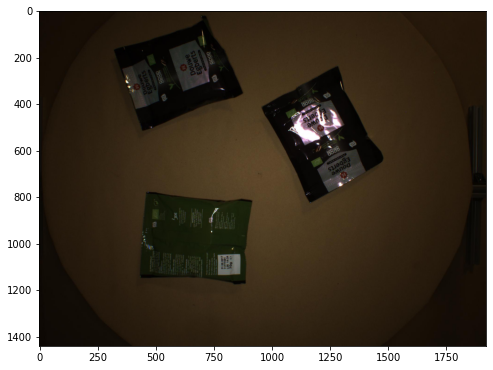

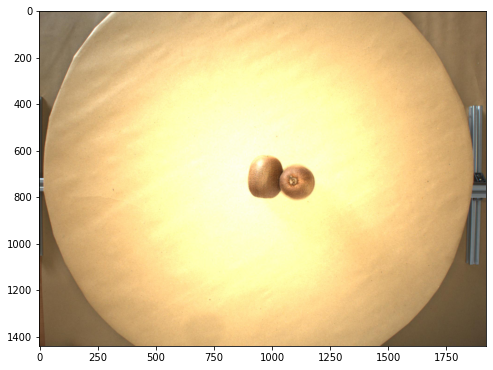

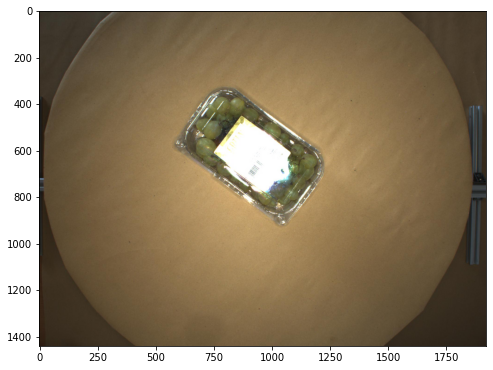

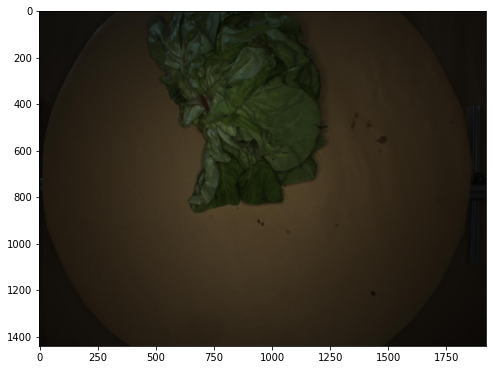

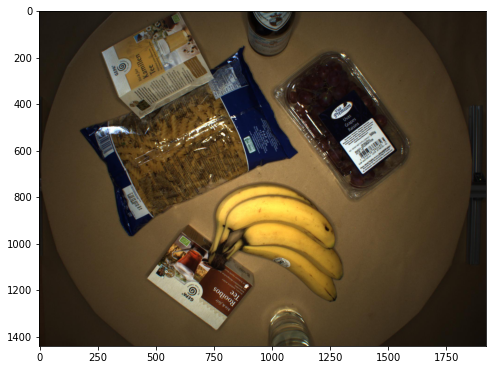

In [ ]:
images = glob("/content/colab_directory/images/*")

for i in range(500,9000,2000):
    image = Image.open(images[i])
    imgplot = plt.imshow(image)
    plt.show()


**Extracting the box coordinates from json files into txt**


In [ ]:
I_w = 1920.0
I_h = 1440.0
for i in range(len(coco.getAnnIds())):
  image_id =  coco.loadAnns(ids=coco.getAnnIds()[i])[0]['image_id']

  x1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][0])
  y1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][1])
  w1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][2])
  h1 = float(coco.loadAnns(ids=coco.getAnnIds()[i])[0]['bbox'][3])
  x = ((x1 + x1 + w1)/2)/I_w
  y = ((y1 + y1 + h1)/2)/I_h
  w = w1 / I_w
  h = h1 / I_h

  category_id = coco.loadAnns(ids=coco.getAnnIds()[i])[0]['category_id']

## this has already been done in google drive and we have the files
'''
  if int(image_id)<100000:
    txt = "/content/colab_directory/lables/" + "D2S_" + "%06d.txt" %image_id
  elif int(image_id)<100000000:
    txt = "/content/colab_directory/labels/" + "D2S_" + "%08d.txt" %image_id

  with open(txt,'a') as file:
    file.write(str(category_id-1) + ' ' + str(x) + ' ' + str(y) + ' ' + str(w) + ' ' + str(h) +  '\n' )
  file.close()
  '''

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 19.30 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5943, done.
remote: Total 5943 (delta 0), reused 0 (delta 0), pack-reused 5943
Receiving objects: 100% (5943/5943), 6.37 MiB | 14.82 MiB/s, done.
Resolving deltas: 100% (3927/3927), done.


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-02-21 00:44:28--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  67.5MB/s    in 2.3s    

2022-02-21 00:44:31 (67.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
folder_path = '/content/colab_directory/D2S/lables'

file = os.listdir(folder_path)

In [ ]:
for i in range(len(file)):
  current = file[i][:-4]
  with open('/content/colab_directory/D2S/train_file_list.txt','a') as file1:
    file1.write('/content/colab_directory/D2S/images/' + current + '.jpg' + '\n')
  file1.close()

In [ ]:
!cp yolov3.cfg yolov3_custom_train.cfg
!cp voc.data d2s.data

**Building the model**

**Making some modification in the model configurations**

In [17]:
# setup training configuration

with open("/content/gdrive/MyDrive/Colab Notebooks/darknet/cfg/yolov3_custom_train.cfg") as f:
    lines = f.readlines()
lines[7] = "width=416\n"
lines[8] = "height=416\n"
lines[19] = "max_batches=6000\n"
lines[21] = "steps=5400\n"
lines[602] = "filters=195\n" # computed as filters=(classes+5)*3
lines[688] = "filters=195\n"
lines[775] = "filters=195\n"
lines[609] = "classes=60\n"
lines[695] = "classes=60\n"
lines[782] = "classes=60\n"
with open("/content/gdrive/MyDrive/Colab Notebooks/darknet/cfg/yolov3_custom_train.cfg", "w") as f:
    f.writelines(lines)


with open("/content/gdrive/MyDrive/Colab Notebooks/darknet/cfg/d2s.data") as f:
    lines = f.readlines()
lines[0] = "classes= 60\n"
lines[1] = "train= data/D2S/train_file_list.txt\n"
lines[2] = "valid= data/D2S/train_file_list.txt\n"
lines[3] = "names= data/coco.names\n"
with open("/content/gdrive/MyDrive/Colab Notebooks/darknet/cfg/d2s.data", "w") as f:
    f.writelines(lines)

In [ ]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/darknet/")

!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

**Training the model**

In [ ]:
!./darknet detector train cfg/d2s.data cfg/yolov3_custom_train.cfg darknet53.conv.74

yolov3_custom_train
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8   

In [ ]:
!./darknet detector train cfg/d2s.data cfg/yolov3_custom_train.cfg

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   

**Model Training and Evaluation**

In [7]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Measuring the performance of the trained model**

In [ ]:
# ## loading the trained model and running mAP evaluation
!./darknet detector map data/frieburg.data yolov3_custom_train.cfg yolov3_custom_train_6000.weights

net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 

 seen 64, trained: 384 K-images (6 Kilo-batches_64) 

 calculation mAP (mean average precision)...
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 

 detections_count = 5351, unique_truth_count = 2261  
 rank = 0 of ranks = 5351 
 rank = 100 of ranks = 5351 
 rank = 200 of ranks = 5351 
 rank = 300 of ranks = 5351 
 rank = 400 of ranks = 5351 
 rank = 500 of ranks = 5351 
 rank = 600 of ranks = 5351 
 rank = 700 of ranks = 5351 
 rank = 800 of ranks = 5351 
 rank = 900 of ranks = 5351 
 rank = 1000 of ranks = 5351 
 rank = 1100 of ranks = 5351 
 rank = 1200 of ranks = 5351 
 rank = 1300 of ranks = 5351 
 rank = 1400 of ranks = 5351 
 rank = 1500 of ranks = 5351 
 rank = 1600 of ranks = 5351 
 rank = 1700 of ranks = 5351 
 rank = 1800 of ranks = 5351 
 rank = 1900 of ranks = 5351 
 rank = 2000 of ranks = 5351 
 rank = 2100 of ranks = 5351 
 rank = 2200 

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 B

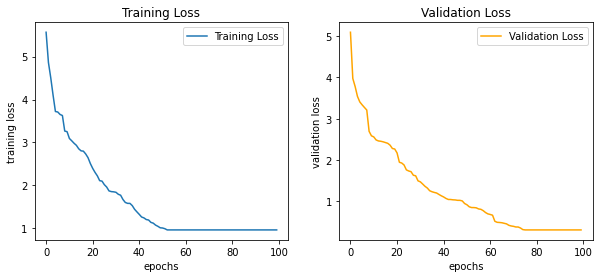

In [208]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.legend(loc='upper right')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('validation loss')
plt.title('Validation Loss')
plt.show()

**Making prediction with the model**

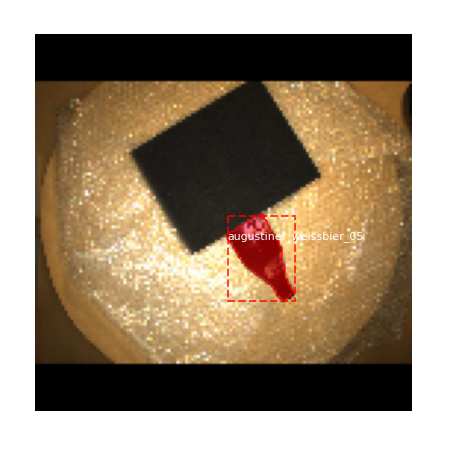

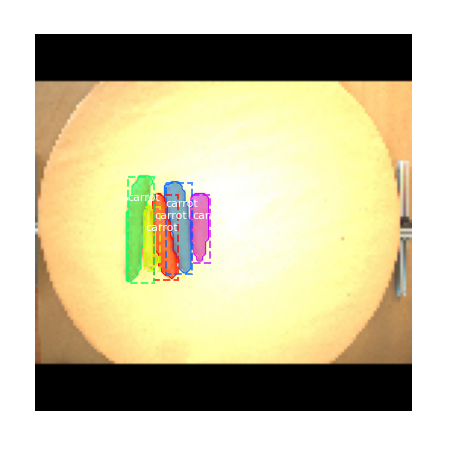

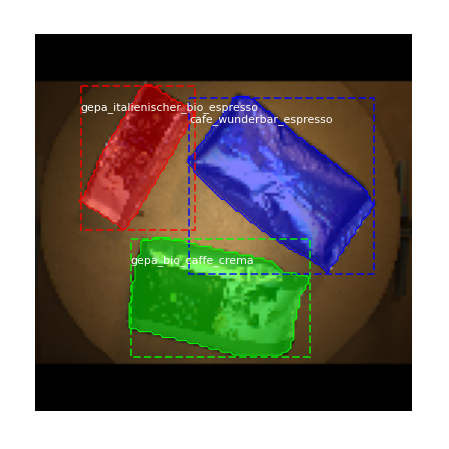

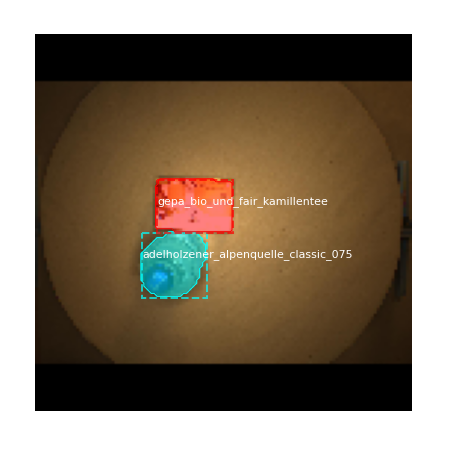

In [ ]:
with open("/content/colab_directory/darknet/data/valid.txt") as f:
    lines = f.readlines()

import time
start_time = time.time()


# generating 10 image predictions from the test set
for i in range(10,50,10):
  img_idx = random.randrange(len(lines))
  img_path = lines[img_idx]
  img_path = img_path[:-1]
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  print(img_path)
  display_img(predict(img))

time_taken = (time.time() - start_time))